In [1]:
import numpy as np
import pandas as pd
from random import*
import mdptoolbox
import time
import math
import statistics

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Transformation of data set into DataFrame, into np.matrix, without headers or other stuff.
def Demand_Matrix(csv):
    _ = pd.read_csv(csv, header=None)
    _ = _.values
    _ = np.delete(_,0,1)
    _ = np.delete(_,0,0)
    _ = _.astype(float)
    _ = np.asmatrix(_)
    return _

In [4]:
#If you want to create one mean matrix using various preapared matrices.
def Mean_Matrix(M1, M2, M3=None, M4=None, M5=None, n=2):
    matrices = [M1, M2, M3, M4, M5]
    return sum(matrices)/n

In [5]:
#If you want to reduce the dimensions of the original matrix.
def nxn(M, desired_n):
    rows = np.shape(M)[0]
    cols = np.shape(M)[1]
    if (rows == cols) & rows%desired_n == 0:
        _ = np.empty((desired_n,desired_n), dtype=int)
        chunk = int(rows/desired_n)
        for ii in range(int(desired_n)):
            for jj in range(int(desired_n)):
                _[ii,jj] = np.sum(M[ii*chunk:(ii+1)*chunk, jj*chunk:(jj+1)*chunk])
    else:
        print("Error: non-square matrix, or no exact division")
    return _, chunk

In [6]:
#Creates a Markov matrix; a transition matrix.
def Transition_Matrix(M):
    n = np.shape(M)[0]
    _ = np.empty((n,n), dtype=float)
    for ii in range(n):
        sf = np.sum(M[ii,:])
        if sf != 0:
            _[ii,:] = M[ii,:]/(np.sum(M[ii,:]))
        else:
            _[ii,:] = 1/n
    return _

In [7]:
#Creates a reward matrix.
def Reward_Matrix(desired_n, mean_price, std_dev):
    _ = np.zeros((desired_n, desired_n))
    for ii in range(desired_n):
        for jj in range(desired_n):
            _[ii,jj] = normalvariate(mean_price, std_dev)
    return _

In [8]:
def select_interest_region(demand_matrix, chunk):
    l = demand_matrix.shape[0]
    matrix = demand_matrix[chunk*3:(l-(chunk*3)),(chunk*3):(l-(chunk*3))]
    return matrix

In [4]:
complete_demand_matrix4 = Demand_Matrix("Demand_Jun_04_2011.csv")
complete_demand_matrix5 = Demand_Matrix("Demand_Jun_05_2011.csv")
complete_demand_matrix6 = Demand_Matrix("Demand_Jun_06_2011.csv")
complete_demand_matrix7 = Demand_Matrix("Demand_Jun_07_2011.csv")
complete_demand_matrix8 = Demand_Matrix("Demand_Jun_08_2011.csv")

/home/santiagortiz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [10]:
desired_n = 10

In [11]:
demand_matrix4, c4 = nxn(complete_demand_matrix4, desired_n)
demand_matrix5, c5 = nxn(complete_demand_matrix5, desired_n)
demand_matrix6, c6 = nxn(complete_demand_matrix6, desired_n)
demand_matrix7, c7 = nxn(complete_demand_matrix7, desired_n)
demand_matrix8, c8 = nxn(complete_demand_matrix8, desired_n)

### 4

In [12]:
demand_matrix4

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    1,    4,    1,    1,    0,    0,    0],
       [   0,    1,    7,   17,   62,   75,    4,    1,    0,    0],
       [   0,    0,    3,   21,  588,  966,    6,    2,    0,    0],
       [   0,    0,    9,   33,  640, 2735,  128,    8,    0,    0],
       [   0,    0,    2,    3,   12,  129,   48,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    1,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [13]:
np.sum(demand_matrix4)

5511

In [14]:
n4 = np.around((demand_matrix4/np.sum(demand_matrix4)),2)
n4

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.11, 0.18, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.12, 0.5 , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

### 5

In [15]:
demand_matrix5

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    3,    3,    4,    0,    0,    0,    0],
       [   0,    0,    4,   29,   65,   53,    1,    1,    0,    0],
       [   0,    0,    9,   27,  569, 1056,   11,    0,    0,    0],
       [   0,    0,    7,   28,  596, 2705,  130,   10,    0,    0],
       [   0,    0,    1,    3,   14,  130,   51,    3,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [16]:
np.sum(demand_matrix5)

5515

In [17]:
n5 = np.around((demand_matrix5/np.sum(demand_matrix5)),2)
n5

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.1 , 0.19, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.11, 0.49, 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

### 6

In [18]:
demand_matrix6

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    4,    2,    4,    3,    0,    0,    0,    0],
       [   0,    1,    4,   15,   55,   65,    4,    0,    0,    0],
       [   0,    0,   10,   31,  567, 1037,   14,    2,    0,    0],
       [   0,    0,    4,   26,  628, 2811,  110,    7,    0,    0],
       [   0,    0,    1,    1,   23,  121,   50,    2,    0,    0],
       [   0,    0,    0,    0,    0,    1,    1,    1,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [19]:
np.sum(demand_matrix6)

5605

In [20]:
n6 = np.around((demand_matrix6/np.sum(demand_matrix6)),2)
n6

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.1 , 0.19, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.11, 0.5 , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

### 7

In [21]:
demand_matrix7

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    3,    2,    5,    8,    0,    0,    0,    0],
       [   0,    1,    5,   29,   59,   68,    3,    3,    0,    0],
       [   0,    0,    3,   35,  658,  977,   14,    3,    0,    0],
       [   0,    1,   12,   42,  654, 2944,   88,    9,    2,    0],
       [   0,    0,    1,    2,   20,  139,   70,    2,    0,    0],
       [   0,    0,    0,    0,    1,    1,    1,    2,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [22]:
np.sum(demand_matrix7)

5868

In [23]:
n7 = np.around((demand_matrix7/np.sum(demand_matrix7)),2)
n7

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.11, 0.17, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.11, 0.5 , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

### 8

In [24]:
demand_matrix8

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2,  24,  26,  43,   1,   0,   0,   0],
       [  0,   0,   4,  21, 223, 342,   6,   2,   0,   0],
       [  0,   0,   6,  30, 154, 740,  56,   7,   3,   0],
       [  0,   0,   0,   3,  13,  64,  17,   1,   1,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [25]:
np.sum(demand_matrix8)

1795

In [26]:
n8 = np.around((demand_matrix8/np.sum(demand_matrix8)),2)
n8

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.12, 0.19, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.02, 0.09, 0.41, 0.03, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.04, 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

### Distancias

In [27]:
complete_demand_matrix_selected_4 = select_interest_region(complete_demand_matrix4, c4)
demand_matrix_selected_4, _ = nxn(complete_demand_matrix_selected_4, 10)

complete_demand_matrix_selected_5 = select_interest_region(complete_demand_matrix5, c5)
demand_matrix_selected_5, _ = nxn(complete_demand_matrix_selected_5, 10)

complete_demand_matrix_selected_6 = select_interest_region(complete_demand_matrix5, c6)
demand_matrix_selected_6, _ = nxn(complete_demand_matrix_selected_6, 10)

complete_demand_matrix_selected_7 = select_interest_region(complete_demand_matrix7, c7)
demand_matrix_selected_7, _ = nxn(complete_demand_matrix_selected_7, 10)

complete_demand_matrix_selected_8 = select_interest_region(complete_demand_matrix8, c8)
demand_matrix_selected_8, _ = nxn(complete_demand_matrix_selected_8, 10)


In [30]:
print(np.sum(demand_matrix_selected_4))
print(np.sum(demand_matrix_selected_5))
print(np.sum(demand_matrix_selected_6))
print(np.sum(demand_matrix_selected_7))
print(np.sum(demand_matrix_selected_8))

5467
5468
5468
5802
1763


In [34]:
ff4 = np.around((demand_matrix_selected_4/np.sum(demand_matrix_selected_4)),2)
ff5 = np.around((demand_matrix_selected_5/np.sum(demand_matrix_selected_5)),2)
ff6 = np.around((demand_matrix_selected_6/np.sum(demand_matrix_selected_6)),2)
ff7 = np.around((demand_matrix_selected_7/np.sum(demand_matrix_selected_7)),2)
ff8 = np.around((demand_matrix_selected_8/np.sum(demand_matrix_selected_8)),2)

In [35]:
print(ff4)
print(ff5)
print(ff6)
print(ff7)
print(ff8)

[[0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.   0.02 0.01 0.03 0.   0.   0.   0.  ]
 [0.   0.   0.   0.03 0.05 0.12 0.02 0.   0.   0.  ]
 [0.   0.   0.   0.02 0.04 0.17 0.04 0.01 0.   0.  ]
 [0.   0.   0.   0.02 0.02 0.14 0.06 0.02 0.01 0.  ]
 [0.   0.   0.   0.   0.   0.03 0.02 0.02 0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.   0.01 0.01 0.03 0.01 0.   0.   0.  ]
 [0.   0.   0.   0.03 0.05 0.13 0.02 0.   0.   0.  ]
 [0.   0.   0.   0.02 0.04 0.17 0.04 0.01 0.   0.  ]
 [0.   0.   0.   0.01 0.02 0.14 0.06 0.02 0.01 0.  ]
 [0.   0.   0.   0.   0.   0.03 0.02 0.01 0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.01 0.   0. 

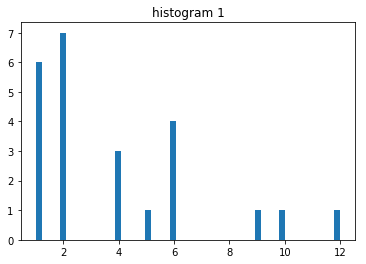

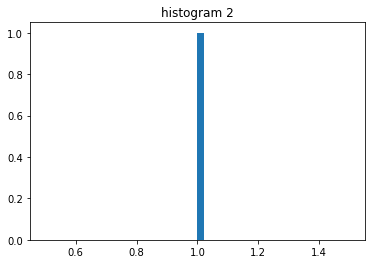

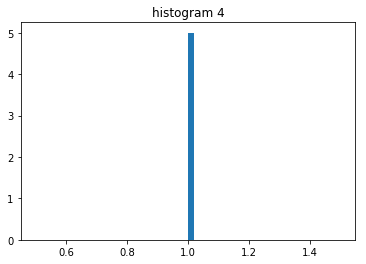

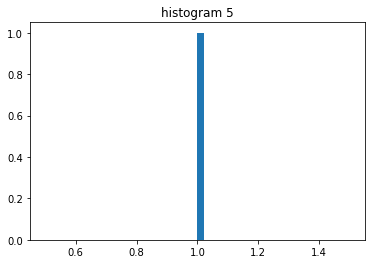

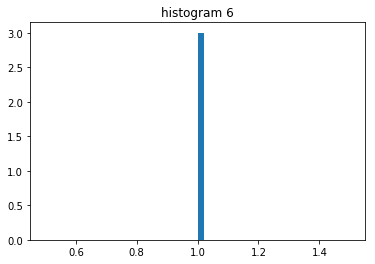

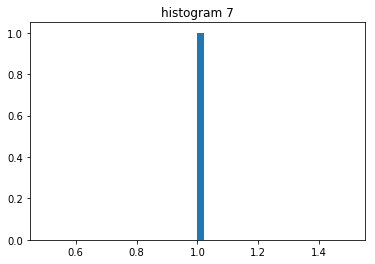

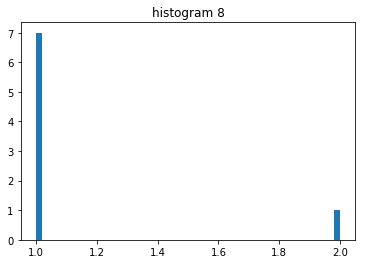

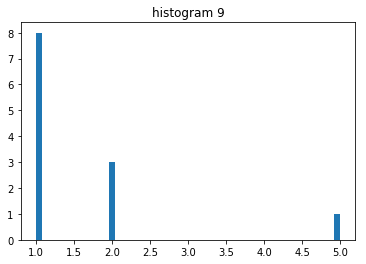

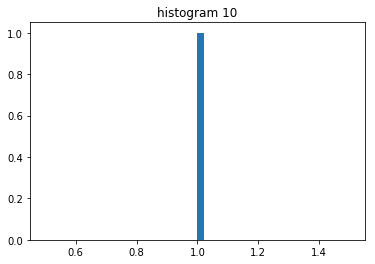

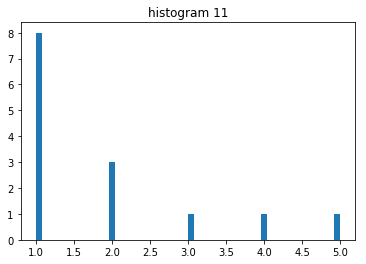

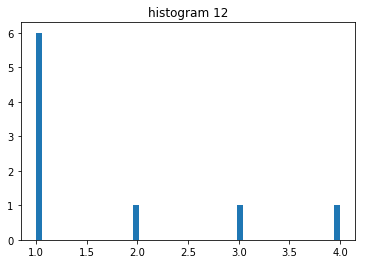

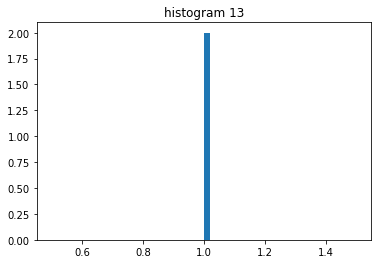

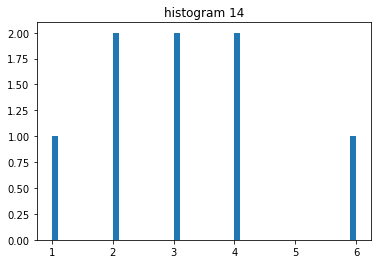

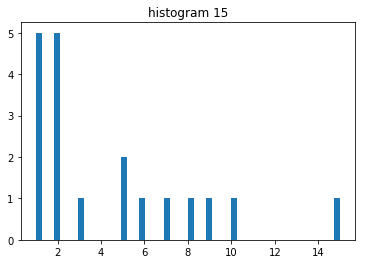

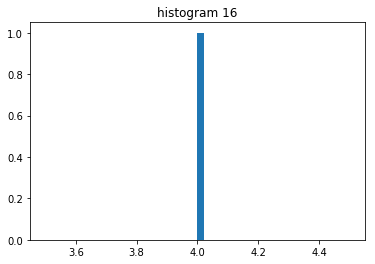

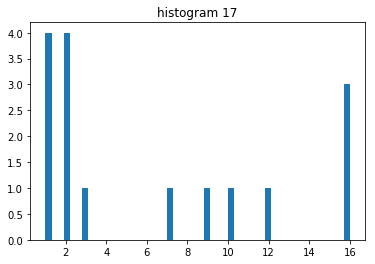

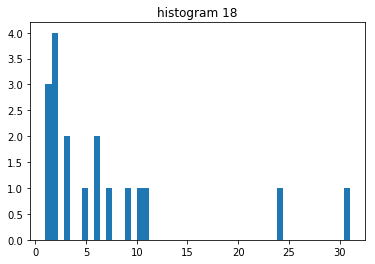

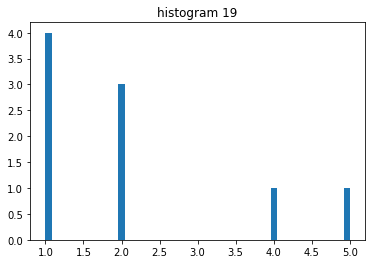

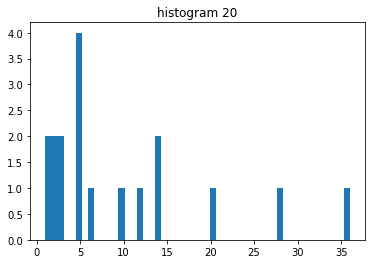

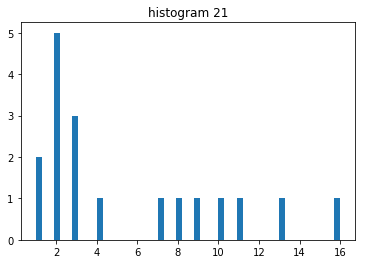

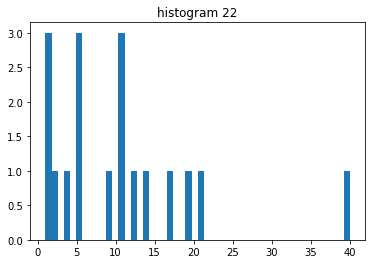

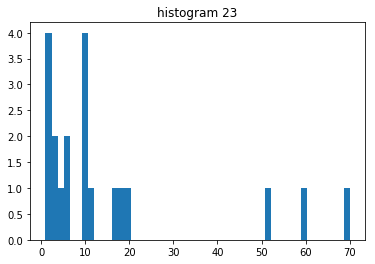

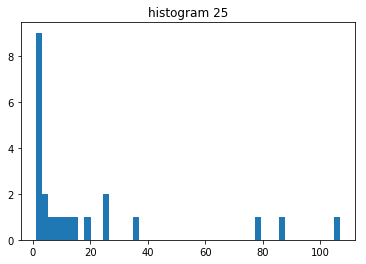

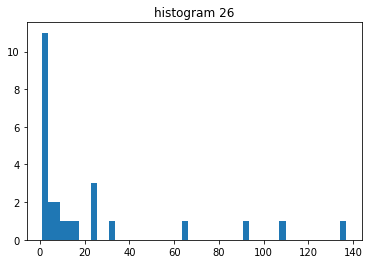

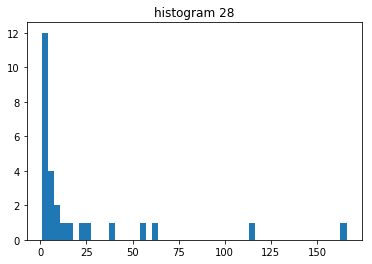

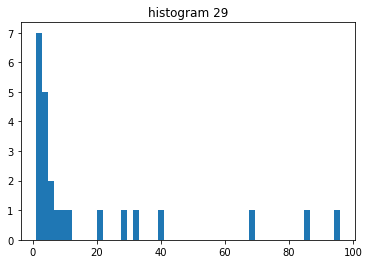

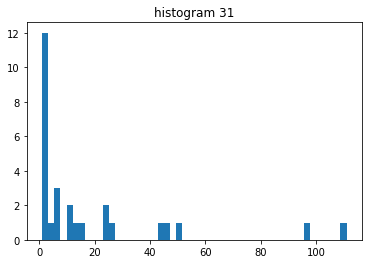

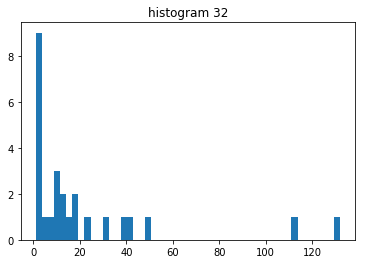

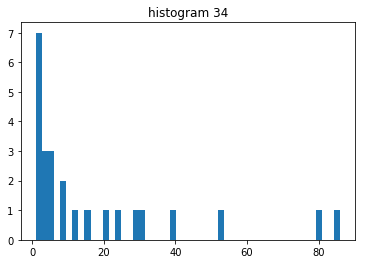

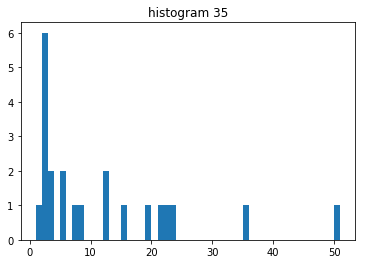

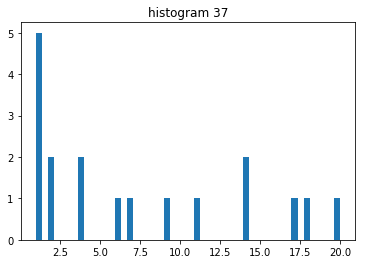

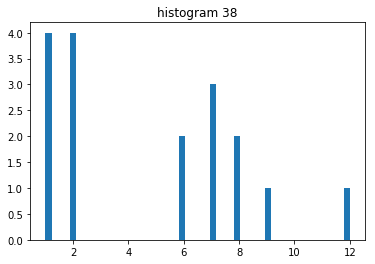

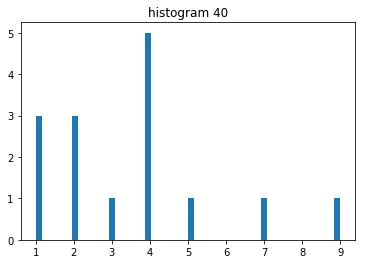

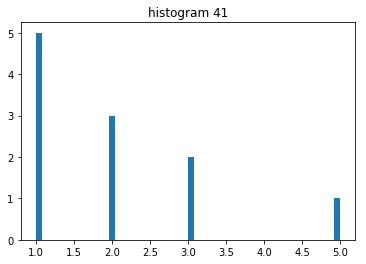

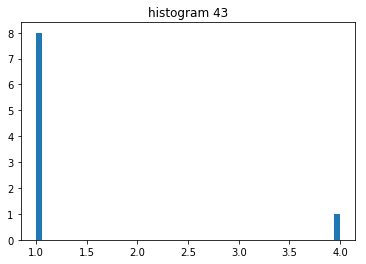

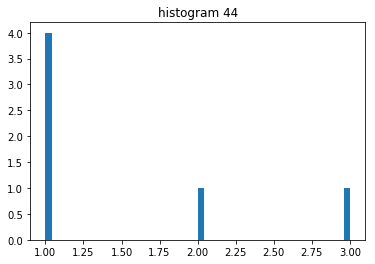

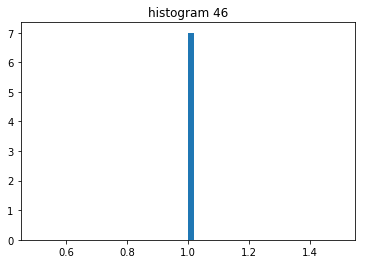

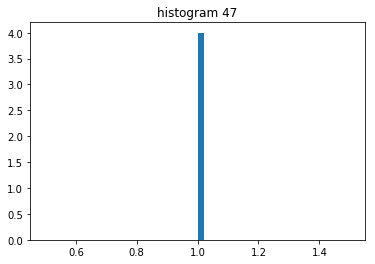

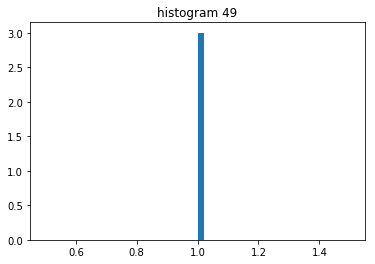

In [30]:
#matrices = [demand_matrix4, demand_matrix5, demand_matrix6, demand_matrix7, demand_matrix8]
#matrices = [n4, n5, n6, n7, n8]
matrices = [demand_matrix_selected_4]
for matrix in matrices:
    for ii in range(matrix.shape[0]):
        if np.sum(matrix[ii]) != 0:
            #plt.hist(matrix[ii], bins=50)
            plt.hist(matrix[ii][matrix[ii]!=0],bins=)
            plt.title("histogram " + str(ii)) 
            plt.show()

In [ ]:
transition_matrix4 = Transition_Matrix(demand_matrix4)
transition_matrix5 = Transition_Matrix(demand_matrix5)
transition_matrix6 = Transition_Matrix(demand_matrix6)
transition_matrix7 = Transition_Matrix(demand_matrix7)
transition_matrix8 = Transition_Matrix(demand_matrix8)

# if you are in neighborhood 1, you can go to 0 or 2.
# depending on what? wherever there is a better chance to catch a new ride.
def Initial_State_Vector(initial_neighborhood, desired_n = desired_n):
    _ = np.zeros(desired_n)
    _[initial_neighborhood] = 1
    return _

def Number_Of_Rides_Vector(demand_mtx):
    n_rows = len(demand_mtx[:,0])
    row_sums = np.zeros(n_rows)
    for row in range(n_rows):
        row_sums[row] = np.sum(demand_mtx[row,:])
    return row_sums

def After_Ride_State_Vector(initial_state, number_of_rides_vector):
    n = len(initial_state)
    neighborhood = np.argmax(initial_state)
    next_state = np.zeros(n)
    
    if neighborhood == 0:
        if number_of_rides_vector[0]>number_of_rides_vector[1]:
            next_state[0] = 1
        else:
            next_state[1] = 1         
    elif neighborhood == n-1:
        if number_of_rides_vector[-1]>number_of_rides_vector[-2]:
            next_state[-1] = 1
        else:
            next_state[-2] = 1
    else:        
        _ = np.array(number_of_rides_vector[neighborhood-1], [number_of_rides_vector[neighborhood], number_of_rides_vector[neighborhood+1]])
        max_index = np.random.choice(np.where(_ == np.max(_))[0])
        next_state[neighborhood + max_index - 1] = 1
        
    return next_state

def Probability_State_Vector(transition_matrix, initial_state_vector):
    return transition_matrix.dot(initial_state_vector)

def Passenger_State_Vector(probability_state_vector):
    n = len(probability_state_vector)
    next_state = np.zeros(n)
    probabilities = probability_state_vector
    index = np.random.choice(n, 1, p=probabilities)
    next_state[index] = 1
    return next_state

pd.set_option("display.max_rows", 8300, "display.max_columns", 8300)
df = pd.read_csv("Demand_Jun_05_2011.csv")

df

example = np.array([1,2,0,3,0,1])

example[2]

x = np.empty(len(example))

x

example2 = np.array([[0,0,1,0,0,0],[1,1,1,0,0,0]])

example2

np.sum(example2[0,:])

len(example2[0,:])

n = len(example2[:,0])
print(n)
for row in range(n):
    suma = np.sum(example2[row,:])
    print(suma)

max(example[5],example[4])

np.random.choice(np.where(example == max(example[5],example[4]))[0])

next_state[np.where(number_of_rides_vector == max(number_of_rides_vector[0], number_of_rides_vector[1]))[0][0]]

example[example==np.max(example)]

np.random.choice(example==np.max(example))

np.where(example == 1)[0]

example3 = np.array([0,1])
p_array = np.array([])

for ii in range(10):
    print(np.random.choice(example3, 1, p=np.array([0.8, 0.2])))

np.random.choice(5, 1)

np.arange(5)

In [5]:
coords_map = pd.read_csv("master-grid-points.csv")
coords_map["index"] = coords_map.index
coords_map["id"] = coords_map["id"].astype(int)
coords_map["index"] = coords_map["index"].astype(int)
coords_map.dtypes
coords_id = coords_map.drop("Latitude", axis=1)
coords_id = coords_id.drop("longitude", axis=1)
coords_id = coords_id.drop("index", axis=1)

In [6]:
coords_map.head()

,id,Latitude,longitude,index
0,309269,40.49343,-74.253005,0
1,309270,40.49343,-74.246979,1
2,309271,40.49343,-74.240953,2
3,309272,40.49343,-74.234927,3
4,309273,40.49343,-74.228901,4


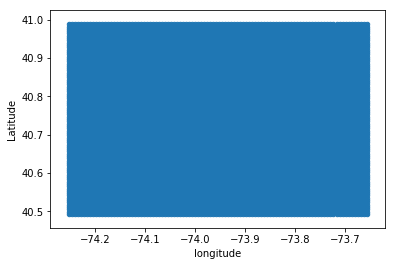

In [7]:
coords_map.plot(kind="scatter", x="longitude", y="Latitude")

In [8]:
coords = coords_map.values

In [43]:
print(coords[0][0])
print(coords[8299][0])

309269.0
391368.0


In [44]:
lat_dist = coords[8299][1]-coords[0][1]

In [45]:
lon_dist = coords[8299][2]-coords[0][2]

In [47]:
dist = math.sqrt(lat_dist**2 + lon_dist**2)
dist*14231

11029.737178111374

In [70]:
def e_distance(initial, final, coordinate_set):
    lat_dist = coordinate_set[final][1]-coordinate_set[initial][1]
    lon_dist = coordinate_set[final][2]-coordinate_set[initial][2]
    distance = math.sqrt(lat_dist**2 + lon_dist**2)
    return distance

In [15]:
def new_coords(new_n):
    
    new_coords = []
    
    coords_map = pd.read_csv("master-grid-points.csv")
    coords_map["index"] = coords_map.index
    coords_map["id"] = coords_map["id"].astype(int)
    coords_map["index"] = coords_map["index"].astype(int)
    coords_id = coords_map.drop("Latitude", axis=1)
    coords_id = coords_id.drop("longitude", axis=1)
    coords_id = coords_id.drop("index", axis=1)
    
    for ii in range(new_n):
        new_coords.append(int(statistics.median(coords_id.values[(8300/new_n)*ii:(8300/new_n)*ii+1])))
    
    coords_reduced = {"id": new_coords}
    c_r = pd.DataFrame(coords_reduced)
    
    return c_r

In [ ]:
new_coords = []

for ii in range(10):
    new_coords.append(int(statistics.median( coords_id.values[830*ii:830*ii+1] )))
    
coords_reduced = {"id": new_coords}
coordenadas_reducidas = pd.DataFrame(coords_reduced)

In [11]:
pu_do = pd.read_csv("Medallion_2011_specifc_time_dataset.csv")

In [13]:
pu_do_matrix = Demand_Matrix("Medallion_2011_specifc_time_dataset.csv")

/home/santiagortiz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [38]:
distances = []
for ii in range(pu_do_matrix.shape[0]):
    for jj in range(pu_do_matrix.shape[1]):
        if pu_do_matrix.item(ii,jj) != 0:
            viajes = pu_do_matrix.item(ii,jj)
            dist = abs(ii-jj)
            for cantidad_de_viajes in range(int(viajes)):
                distances.append(dist)

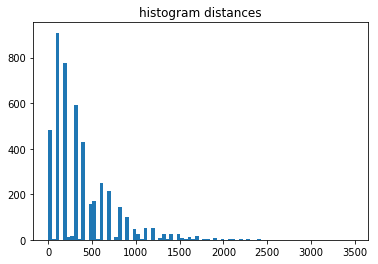

In [46]:
plt.hist(distances, bins=83)
plt.title("histogram distances") 
plt.show()

In [11]:
def distances_list(matrices_list):
    distances = []
    for matrix in matrices:
        for ii in range(matrix.shape[0]):
            for jj in range(matrix.shape[1]):
                if matrix.item(ii,jj) != 0:
                    viajes = matrix.item(ii,jj)
                    dist = abs(ii-jj)
                    for cantidad_de_viajes in range(int(viajes)):
                        distances.append(dist)
    return distances

In [9]:
matrices = [complete_demand_matrix4, 
            complete_demand_matrix5,
            complete_demand_matrix6,
            complete_demand_matrix7,
            complete_demand_matrix8]

In [37]:
distancias = distances_list(matrices)

In [107]:
max(dist4)

0.43610900392895513

(array([618., 693., 372., ...,   0.,   0.,   1.]),
 array([   1,    2,    3, ..., 3578, 3579, 3580]),
 <a list of 3579 Patch objects>)

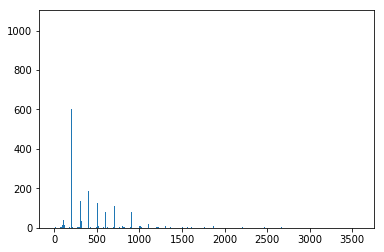

In [27]:
plt.hist(distancias, bins=[ii for ii in range(1,3582)])

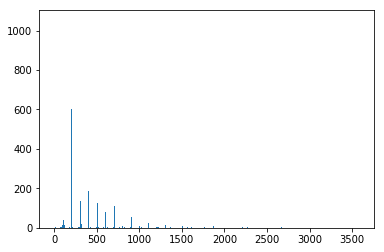

In [28]:
n , bins, patches = plt.hist(distancias, bins=[ii for ii in range(1,3582)])

In [71]:
def matrix_distances_list(matrix):    
    distances = []
    for ii in range(matrix.shape[0]):
        for jj in range(matrix.shape[1]):
            if matrix.item(ii,jj) != 0:
                viajes = matrix.item(ii,jj)
                dist = e_distance(ii,jj,coords)
                for cantidad_de_viajes in range(int(viajes)):
                    distances.append(dist)
    return distances

In [74]:
dist4 = matrix_distances_list(complete_demand_matrix4)
dist5 = matrix_distances_list(complete_demand_matrix5)
dist6 = matrix_distances_list(complete_demand_matrix6)
dist7 = matrix_distances_list(complete_demand_matrix7)
dist8 = matrix_distances_list(complete_demand_matrix8)

In [77]:
distdf4 = pd.DataFrame({'viaje':dist4})

distdf5 = pd.DataFrame({'viaje':dist5})
distdf6 = pd.DataFrame({'viaje':dist6})
distdf7 = pd.DataFrame({'viaje':dist7})
distdf8 = pd.DataFrame({'viaje':dist8})

In [78]:
distdf4.to_excel("dist4.xlsx")

distdf5.to_excel("dist5.xlsx")
distdf6.to_excel("dist6.xlsx")
distdf7.to_excel("dist7.xlsx")
distdf8.to_excel("dist8.xlsx")

In [82]:
max(dist4)

0.43610900392895513

In [103]:
import matplotlib

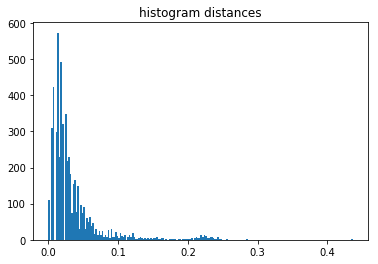

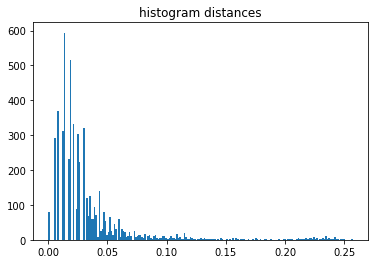

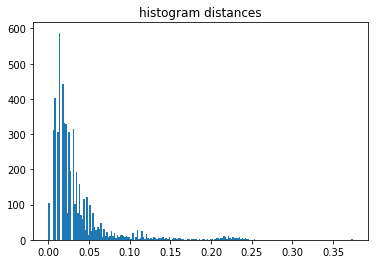

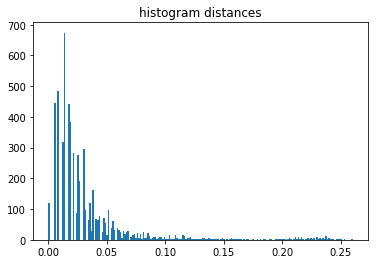

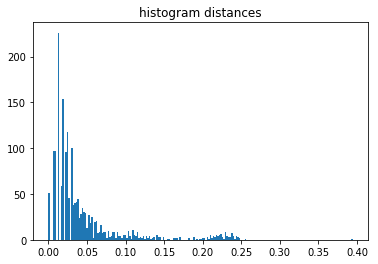

In [113]:
for dist in [dist4, dist5, dist6, dist7, dist8]:
    plt.axis(xlim=(0, 0.437), ylim=(0, 600))
    plt.hist(dist, bins=200)
    plt.title("histogram distances") 
    plt.show()

In [132]:
def l1_distance(initial, final, coordinate_set):
    lat_dist = coordinate_set[final][1]-coordinate_set[initial][1]
    lon_dist = coordinate_set[final][2]-coordinate_set[initial][2]
    distance = abs(lat_dist + lon_dist)
    return distance

In [133]:
def matrixl_distances_list(matrix):    
    distances = []
    for ii in range(matrix.shape[0]):
        for jj in range(matrix.shape[1]):
            if matrix.item(ii,jj) != 0:
                viajes = matrix.item(ii,jj)
                dist = l1_distance(ii,jj,coords)
                for cantidad_de_viajes in range(int(viajes)):
                    distances.append(dist)
    return distances

In [134]:
ldist4 = matrixl_distances_list(complete_demand_matrix4)
ldist5 = matrixl_distances_list(complete_demand_matrix5)
ldist6 = matrixl_distances_list(complete_demand_matrix6)
ldist7 = matrixl_distances_list(complete_demand_matrix7)
ldist8 = matrixl_distances_list(complete_demand_matrix8)

In [135]:
ldistdf4 = pd.DataFrame({'viaje':ldist4})
ldistdf5 = pd.DataFrame({'viaje':ldist5})
ldistdf6 = pd.DataFrame({'viaje':ldist6})
ldistdf7 = pd.DataFrame({'viaje':ldist7})
ldistdf8 = pd.DataFrame({'viaje':ldist8})

In [136]:
ldistdf4.to_excel("ldist4.xlsx")
ldistdf5.to_excel("ldist5.xlsx")
ldistdf6.to_excel("ldist6.xlsx")
ldistdf7.to_excel("ldist7.xlsx")
ldistdf8.to_excel("ldist8.xlsx")

In [138]:
def separar_cola(distance_list):
    sin_cola = []
    cola = []
    for distancia in distance_list:
        if distancia == 0:
            continue
        if (distancia>0) & (distancia<=0.19):
            sin_cola.append(distancia)
        if distancia > 0.19:
            cola.append(distancia)
    return sin_cola, cola

In [ ]:
sin_cola4, cola4 = separar_cola(ldist4)
sin_cola5, cola5 = separar_cola(ldist5)
sin_cola6, cola6 = separar_cola(ldist6)
sin_cola7, cola7 = separar_cola(ldist7)
sin_cola8, cola8 = separar_cola(ldist8)

In [ ]:
sin4 = pd.DataFrame({'viaje':sin_cola4})
sin5 = pd.DataFrame({'viaje':sin_cola5})
sin6 = pd.DataFrame({'viaje':sin_cola6})
sin7 = pd.DataFrame({'viaje':sin_cola7})
sin8 = pd.DataFrame({'viaje':sin_cola8})

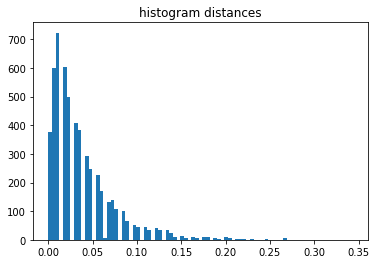

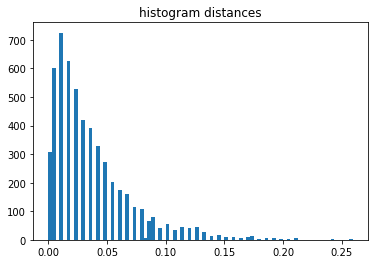

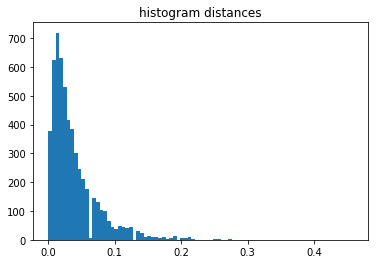

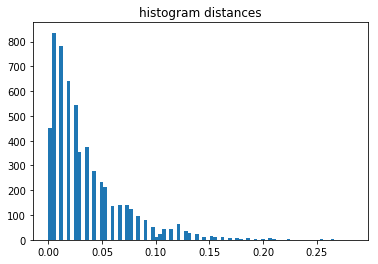

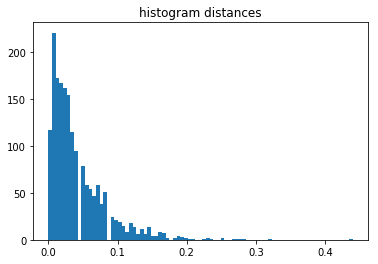

In [141]:
for dist in [ldist4, ldist5, ldist6, ldist7, ldist8]:
    plt.axis(xlim=(0, 0.437), ylim=(0, 600))
    plt.hist(dist, bins=83)
    plt.title("histogram distances") 
    plt.show()